In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [2]:
#pd.read_excel?

In [3]:
call_data = pd.read_excel(r'C:\Users\arpit\Desktop\call_forecasting.xlsx')
call_data.head(1)

,Weekending,call_volume
0,2016-01-02,2702


In [4]:
call_data.tail(1)

,Weekending,call_volume
156,2018-12-29,688


In [5]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
Weekending     157 non-null datetime64[ns]
call_volume    157 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [6]:
call_data.columns = ['', 'call_volume']

In [7]:
call_data.head()

,,call_volume
0,2016-01-02,2702
1,2016-01-09,3218
2,2016-01-16,2685
3,2016-01-23,2560
4,2016-01-30,2562


In [8]:
call_data.describe()

,call_volume
count,157.000000
mean,1294.675159
std,518.230238
min,672.000000
25%,921.000000
50%,1106.000000
75%,1542.000000
max,3218.000000


In [9]:
import pandas_profiling

In [10]:
#pandas_profiling.ProfileReport(call_data)

In [11]:
weeks = call_data['']

In [12]:
call_data.set_index(weeks, inplace=True)

In [13]:
call_data.head()

,,call_volume
,,
2016-01-02,2016-01-02,2702
2016-01-09,2016-01-09,3218
2016-01-16,2016-01-16,2685
2016-01-23,2016-01-23,2560
2016-01-30,2016-01-30,2562


In [14]:
call_data.drop('',inplace=True,axis =1)

In [15]:
call_data.head()

,call_volume
,
2016-01-02,2702
2016-01-09,3218
2016-01-16,2685
2016-01-23,2560
2016-01-30,2562


In [16]:
#plt.plot(call_data, figsize=(8,8))

Text(0, 0.5, 'Call Volume')

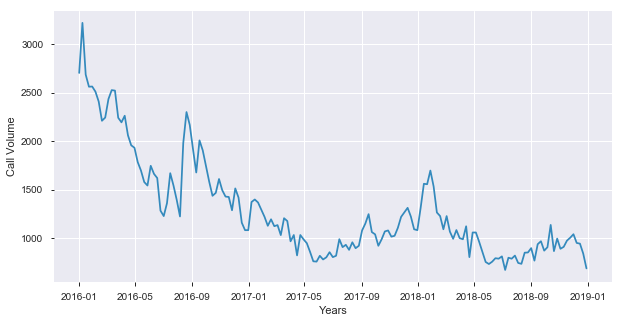

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(call_data)
plt.xlabel('Years')
plt.ylabel('Call Volume')

Now we start with time series decomposition of this data to understand underlying patterns such as trend, seasonality, cycle and irregular remainder for call volume.

We will build our model based on the following function:

- Yt=f(Trendt,Seasonalityt,Remaindert)
- Yt=f(Trendt,Seasonalityt,Remaindert)
 
Step 1.1: Trend - Time Series Decomposition
we can check stationarity using the following:

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.
Moving Average - A good analogy for moving average is ironing clothes to remove wrinkles. The idea with moving average is to remove all the zigzag motion (wrinkles) from the time series to produce a steady trend through averaging adjacent values of a time period. Hence, the formula for moving average is:

MovingAverage=∑mi=−mYt+i2m
MovingAverage=∑i=−mmYt+i2m
 
Now, let’s try to remove wrinkles from our time series using moving average. We will take moving average of different time periods i.e. 4,6,8, and 12 months as shown below. Here, moving average is shown in red and actual series in blue.

In [18]:
call_data.rolling(window=4).mean()

,call_volume
,
2016-01-02,NaN
2016-01-09,NaN
2016-01-16,NaN
2016-01-23,2791.25
2016-01-30,2756.25
2016-02-06,2579.00
2016-02-13,2509.50
2016-02-20,2421.75
2016-02-27,2341.75


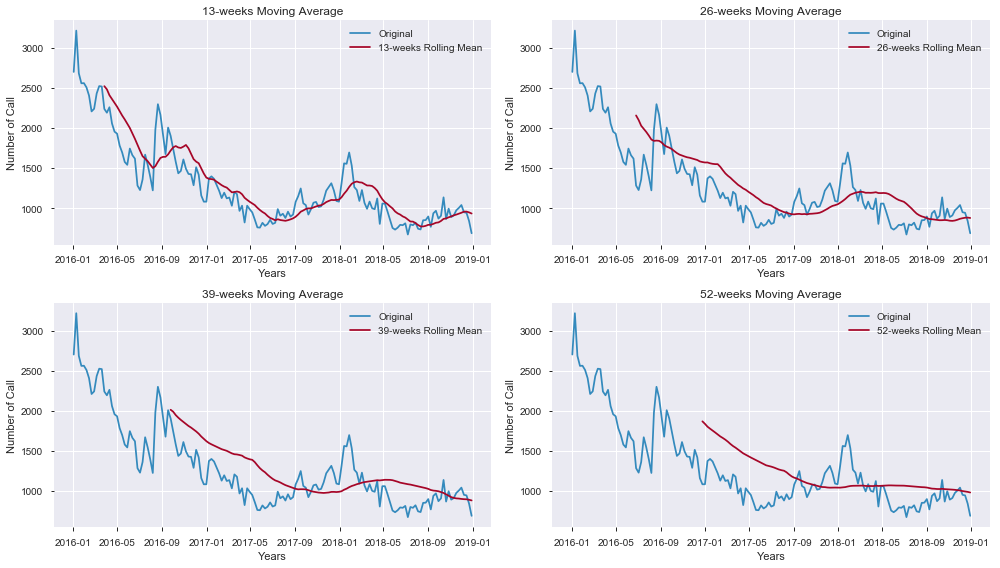

In [19]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(call_data.index, call_data, label='Original')
axes[0][0].plot(call_data.index, call_data.rolling(window=13).mean(), label='13-weeks Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Call")
axes[0][0].set_title("13-weeks Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(call_data.index, call_data, label='Original')
axes[0][1].plot(call_data.index, call_data.rolling(window=26).mean(), label='26-weeks Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Call")
axes[0][1].set_title("26-weeks Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(call_data.index, call_data, label='Original')
axes[1][0].plot(call_data.index, call_data.rolling(window=39).mean(), label='39-weeks Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Call")
axes[1][0].set_title("39-weeks Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(call_data.index, call_data, label='Original')
axes[1][1].plot(call_data.index, call_data.rolling(window=52).mean(), label='52-weeks Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Call")
axes[1][1].set_title("52-weeks Moving Average")
axes[1][1].legend(loc='best')


plt.tight_layout()
plt.show()

In [20]:
call_ts = call_data.copy()
call_ts.head(1)

,call_volume
,
2016-01-02,2702


In [23]:
call_data.index

DatetimeIndex(['2016-01-02', '2016-01-09', '2016-01-16', '2016-01-23',
               '2016-01-30', '2016-02-06', '2016-02-13', '2016-02-20',
               '2016-02-27', '2016-03-05',
               ...
               '2018-10-27', '2018-11-03', '2018-11-10', '2018-11-17',
               '2018-11-24', '2018-12-01', '2018-12-08', '2018-12-15',
               '2018-12-22', '2018-12-29'],
              dtype='datetime64[ns]', name='', length=157, freq=None)

In [21]:
dates = call_data.index

import calendar
call_data['week_nbr'] = dates.week

call_data['year'] = dates.year

In [22]:
dates

DatetimeIndex(['2016-01-02', '2016-01-09', '2016-01-16', '2016-01-23',
               '2016-01-30', '2016-02-06', '2016-02-13', '2016-02-20',
               '2016-02-27', '2016-03-05',
               ...
               '2018-10-27', '2018-11-03', '2018-11-10', '2018-11-17',
               '2018-11-24', '2018-12-01', '2018-12-08', '2018-12-15',
               '2018-12-22', '2018-12-29'],
              dtype='datetime64[ns]', name='', length=157, freq=None)

In [33]:
call_data.head(1)

,call_volume,week_nbr,year
,,,
2016-01-02,2702,53,2016


In [34]:
weekly_call_data = pd.pivot_table(call_data, values = "call_volume", columns = "year", index = "week_nbr")
weekly_call_data.head(1)

year,2016,2017,2018
week_nbr,,,
1,3218.0,1372.0,1310.0


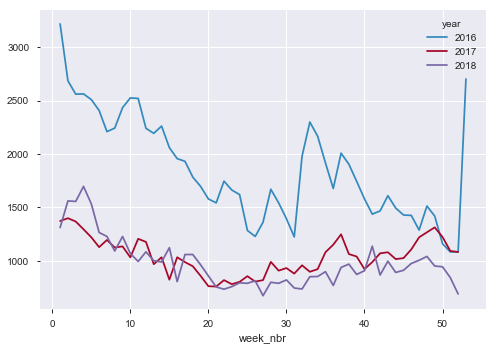

In [35]:
weekly_call_data.plot()

In [37]:
yearly_call_data = pd.pivot_table(call_data, values = "call_volume", columns = "week_nbr", index = "year")
yearly_call_data.head(1)

week_nbr,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
year,,,,,,,,,,,,,,,,,,,,,
2016,3218.0,2685.0,2560.0,2562.0,2509.0,2407.0,2209.0,2242.0,2433.0,2525.0,...,1493.0,1428.0,1424.0,1287.0,1512.0,1418.0,1159.0,1082.0,1082.0,2702.0


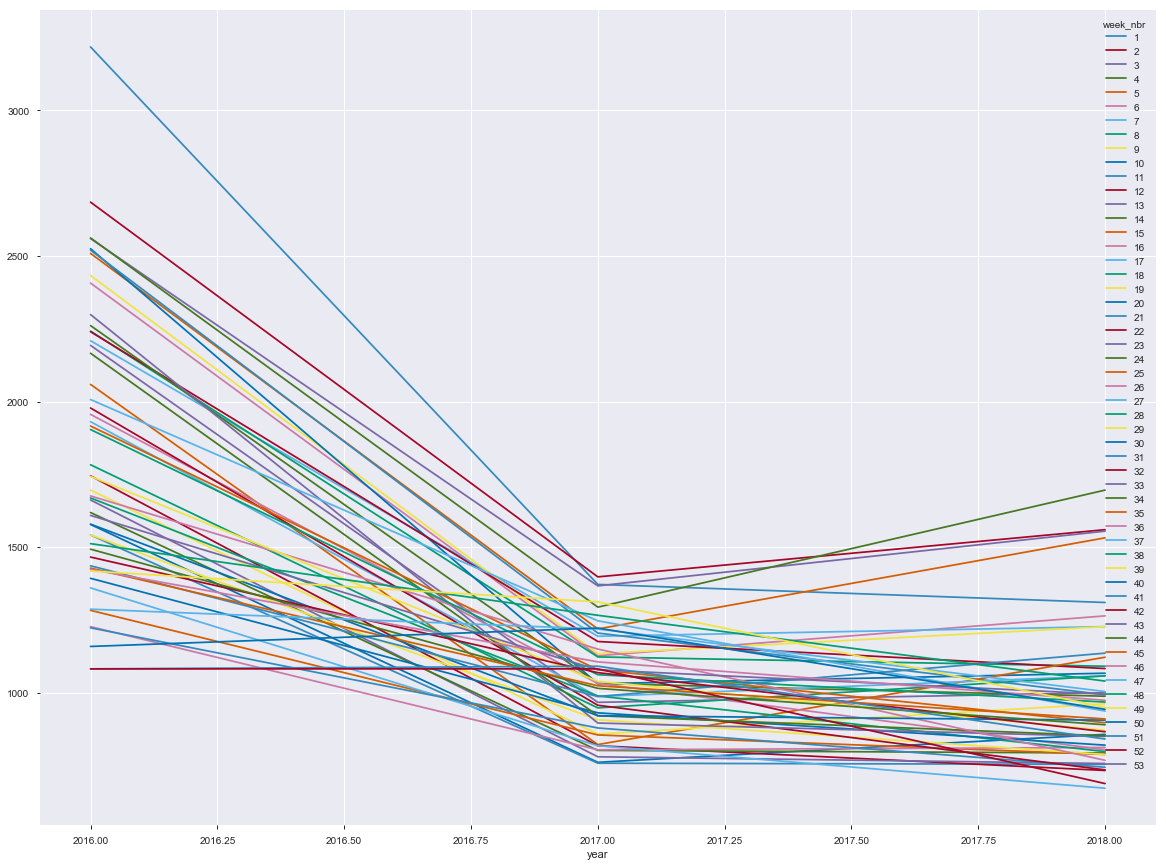

In [38]:
yearly_call_data.plot(legend= True,figsize=(20,15))


#### Step 1.3: Irregular Remainder – Time Series Decomposition
To decipher underlying patterns in tractor sales, we build a multiplicative time series decomposition model with the following equation:

- Yt=Trendt×Seasonalityt×Remaindert
 
Instead of multiplicative model we could have chosen additive model as well. In that case the equaltion would have been:

- Yt=Trendt+Seasonalityt+Remaindert
 
However, it would have made very little difference in terms of conclusion we will draw from this time series decomposition exercise. Additionally, we are also aware that plain vanilla decomposition models like these are rarely used for forecasting. Their primary purpose is to understand underlying patterns in temporal data to use in more sophisticated analysis like Holt-Winters seasonal method or ARIMA.

In [121]:
sm.tsa.seasonal_decompose?

In [ ]:
#smt.seasonal_decompose

In [44]:
call_ts.head(1)

,call_volume
,
2016-01-02,2702


In [47]:
decomposition = sm.tsa.seasonal_decompose(call_ts, model='multiplicative',two_sided=False,extrapolate_trend=4)

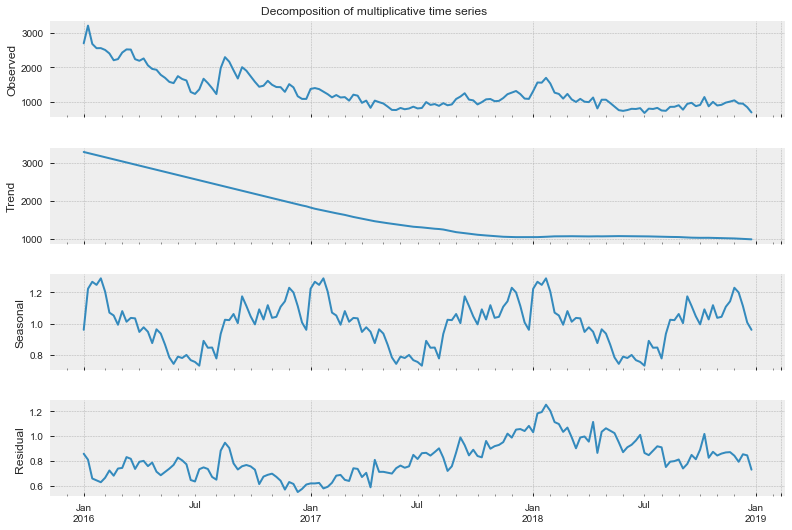

In [48]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

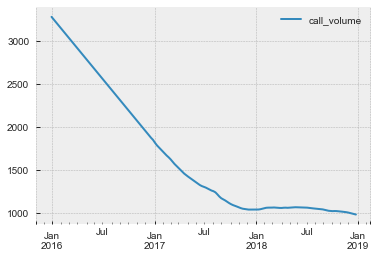

In [49]:
decomposition.trend.plot()

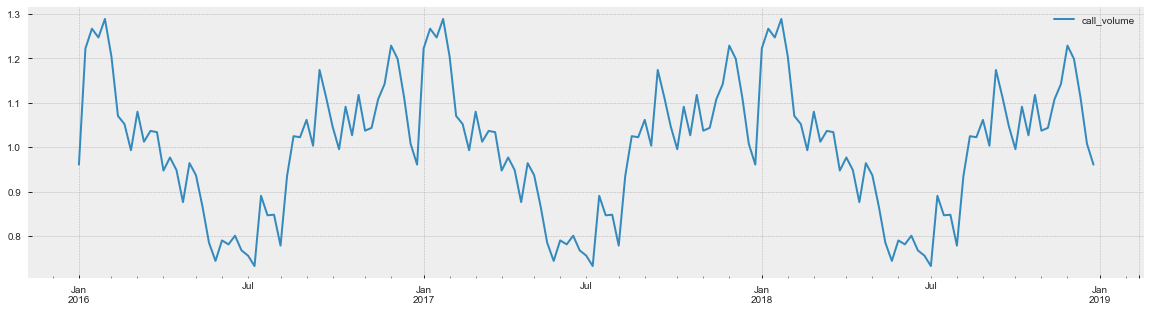

In [52]:
decomposition.seasonal.plot(legend= True,figsize=(20,5))


In [63]:
#pd.concat([(pd.Series(decomposition.seasonal)),(pd.Series(decomposition.trend))])

In [64]:
decompose_out = pd.DataFrame(pd.concat([decomposition.observed,decomposition.trend,decomposition.seasonal,decomposition.resid],axis=1))

In [65]:
decompose_out.columns = ['observed','trend','seasonal','irregular']

In [66]:
decompose_out['TSI'] = decompose_out.trend*decompose_out.seasonal*decompose_out.irregular

In [67]:
decompose_out.head()

,observed,trend,seasonal,irregular,TSI
,,,,,
2016-01-02,2702,3282.859615,0.960909,0.856546,2702.0
2016-01-09,3218,3255.270192,1.222451,0.808663,3218.0
2016-01-16,2685,3227.680769,1.267026,0.656551,2685.0
2016-01-23,2560,3200.091346,1.247274,0.641380,2560.0
2016-01-30,2562,3172.501923,1.288965,0.626522,2562.0


In [81]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,mean,drift,seasonal_naive)

In [82]:
decomp_out = decompose(call_ts,period=52)

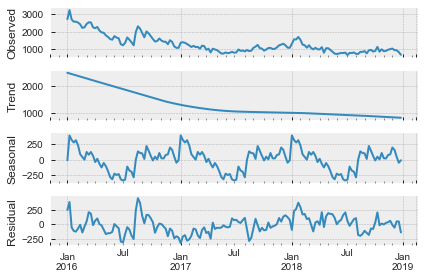

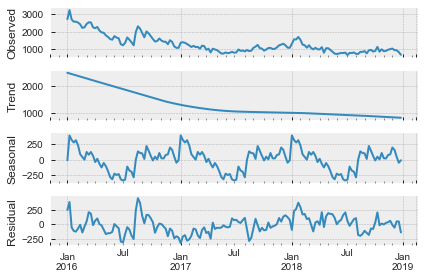

In [83]:
decomp_out.plot()

In [84]:
forecast_out = forecast(decomp_out,steps=52, fc_func=drift,seasonal=True)

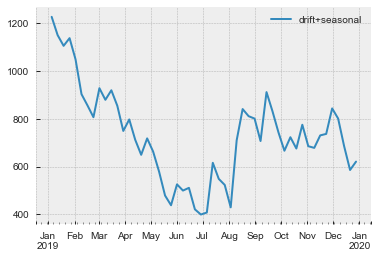

In [87]:
forecast_out.plot()

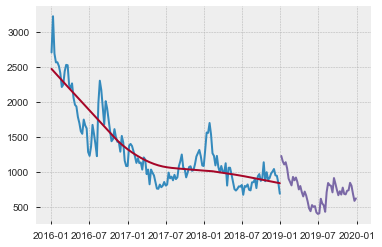

In [90]:
plt.plot(call_ts)
plt.plot(decomp_out.trend)
plt.plot(forecast_out)

In [91]:
forecast_out

,drift+seasonal
2019-01-05,1226.020301
2019-01-12,1149.532203
2019-01-19,1104.853476
2019-01-26,1136.994910
2019-02-02,1048.298607
2019-02-09,902.777421
2019-02-16,855.811697
2019-02-23,806.599627
2019-03-02,927.839101
2019-03-09,879.223478


### Dickey-Fuller Test 
- Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [92]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

In [93]:
call_ts.head()

,call_volume
,
2016-01-02,2702
2016-01-09,3218
2016-01-16,2685
2016-01-23,2560
2016-01-30,2562


In [95]:
call_ts = pd.Series(call_ts['call_volume'])
call_ts.head()

KeyError: 'call_volume'

In [96]:
adfuller(call_ts)

(-2.6925145026378585,
 0.07534256833853495,
 5,
 151,
 {'1%': -3.4744158894942156,
  '5%': -2.880878382771059,
  '10%': -2.577081275821236},
 1797.8216694335079)

In [134]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(call_ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.692515
p-value                          0.075343
#lags Used                       5.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


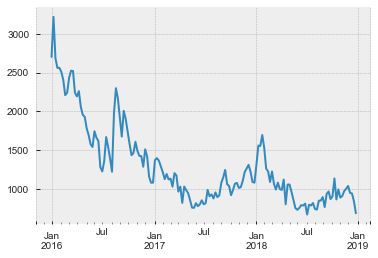

In [97]:
call_ts.plot()

In [98]:
call_ts_log = np.log10(call_ts)

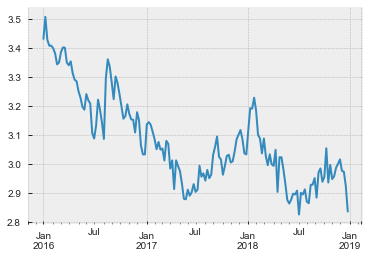

In [99]:
call_ts_log.plot()

In [100]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(call_ts_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput,'.8f')

Results of Dickey-Fuller Test:
Test Statistic                  -2.065233
p-value                          0.258722
#lags Used                       5.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64 .8f


In [101]:
call_ts.diff(1).head()


2016-01-02      NaN
2016-01-09    516.0
2016-01-16   -533.0
2016-01-23   -125.0
2016-01-30      2.0
Name: call_volume, dtype: float64

In [102]:
call_ts_diff1 = call_ts.diff(1)
call_ts_diff1.dropna(inplace=True)

In [103]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(call_ts_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.464819
p-value                          0.000002
#lags Used                       4.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


In [104]:
#p_value =dfoutput[1]

In [105]:
#print(format(p_value,'f'))

In [106]:
call_ts_log_diff1 = call_ts_log.diff(1)
call_ts_log_diff1.dropna(inplace=True)

In [108]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(call_ts_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.980158e+00
p-value                        1.846705e-07
#lags Used                     4.000000e+00
Number of Observations Used    1.510000e+02
Critical Value (1%)           -3.474416e+00
Critical Value (5%)           -2.880878e+00
Critical Value (10%)          -2.577081e+00
dtype: float64


In [109]:
call_ts_diff1.head()


2016-01-09    516.0
2016-01-16   -533.0
2016-01-23   -125.0
2016-01-30      2.0
2016-02-06    -53.0
Name: call_volume, dtype: float64

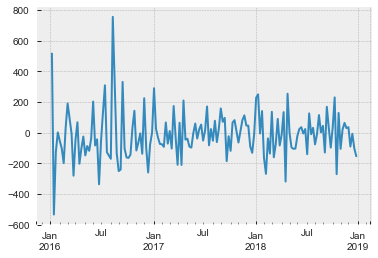

In [111]:
call_ts_diff1.plot()

#### Step 2: Difference data to make data stationary on mean (remove trend)
Clearly the call_volume has an upward trend for tractors sales and there is also a seasonal component that we have already analyzed.

The next thing to do is to make the series stationary by removing the upward trend through 1st order differencing of the series using the following formula:

1st Differencing (d=1) |  Y′t=Yt−Yt−1

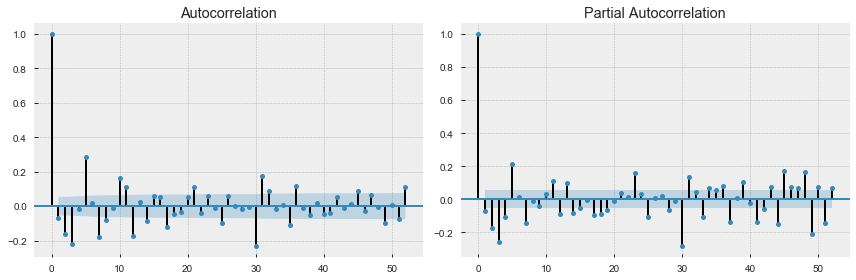

In [112]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(call_ts_diff1, lags=52, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(call_ts_diff1, lags=52, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [149]:
sm.tsa.statespace.SARIMAX?

In [113]:
model = sm.tsa.statespace.SARIMAX(call_ts, order = (0,1,0), seasonal_order= (0,1,0,52),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


In [114]:
results = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [115]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        call_volume   No. Observations:                  157
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -681.727
Date:                            Mon, 13 Jul 2020   AIC                           1365.454
Time:                                    02:08:07   BIC                           1368.089
Sample:                                01-02-2016   HQIC                          1366.522
                                     - 12-29-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.284e+04   3218.051     10.204      0.000    2.65e+04    3.91e+04
Ljung-Box (Q):                     

In [116]:
results.forecast(steps=4)

2019-01-05     916.0
2019-01-12    1166.0
2019-01-19    1161.0
2019-01-26    1302.0
Freq: W-SAT, dtype: float64

In [123]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [124]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [127]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(P, D, Q))]

In [128]:
seasonal_pdq

[(0, 0, 0, 52),
 (0, 0, 1, 52),
 (0, 1, 0, 52),
 (0, 1, 1, 52),
 (1, 0, 0, 52),
 (1, 0, 1, 52),
 (1, 1, 0, 52),
 (1, 1, 1, 52)]

In [129]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(call_ts,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}52 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(2, 2, 2)x(1, 1, 0, 52)52 model - AIC:630.659474441729


#### Akaike Information Criterion (AIC) 
- AIC is an effort to balance the model between goodness-of-fit and number of parameters used in the model. This is similar to the balancing act between income and cost of a company so that the debs of the company is optimized (Debt = Cost - Income). As a modeler, we care about the maximum goodness of fit (income) with the minimum number of parameters (cost).

AIC=2K−2ln(L)AIC=2K−2ln(L) 

For the given model, L in the above formula is the maximized value of the likelihood function representing goodness-of-fit, and K the number of estimated parameters. Like our debts, we want to keep AIC value at the minimum to choose the best possible model. Bayesian Information Criterion (BIC) is another variant of AIC and is used for the same purpose of best fit model selection. For the best possible model selection, we want to look at AIC, BIC, and AICc (AIC with sample correction) if all these values are minimum for a given model. With increasing parameters K will increase and hence AIC increases. While with the goodness of the fit L increases thus decreasing AIC.

As expected, our model has I (or integrated) component equal to 1. This represents differencing of order 1. There is additional differencing of lag 12 in the above best fit model. Moreover, the best fit model has MA value of order 1. Also, there is seasonal MA with lag 12 of order 1.

The model that we got here is different from the one that was discussed in the blog. Let us validate that model with ours how does that perform with statsmodel as well as our model.

In [159]:
best_model = sm.tsa.statespace.SARIMAX(call_ts,
                                      order=(2, 1, 2),
                                      seasonal_order=(1, 1, 0, 52),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [173]:
print(best_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        call_volume   No. Observations:                  157
Model:             SARIMAX(2, 1, 2)x(1, 1, 0, 52)   Log Likelihood                -312.867
Date:                            Mon, 01 Jun 2020   AIC                            637.734
Time:                                    01:32:28   BIC                            649.206
Sample:                                01-02-2016   HQIC                           642.102
                                     - 12-29-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2500      0.899      1.390      0.165      -0.513       3.013
ar.L2         -0.4075      0.405   

In [184]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2018-01-06'), full_results=True)

In [185]:
forecast = pred_dynamic.predicted_mean

In [186]:
actual = call_ts['2018-01-06':]

In [188]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)
MAPE_last1year

0.10608551774193099

In [189]:
print('The Mean Absolute percentage error of our forecast for last one years is {}'.format(round(MAPE_last1year, 4)))


The Mean Absolute percentage error of our forecast for last one years is 0.1061


In [190]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 17691.3773
The ROOT Mean Squared Error of our forecasts is 133.0089369177876


In [160]:
best_results.forecast(steps=52)

2019-01-05     996.443201
2019-01-12    1223.740325
2019-01-19    1229.500418
2019-01-26    1322.951729
2019-02-02    1184.212956
2019-02-09     961.382620
2019-02-16     950.016990
2019-02-23     829.383953
2019-03-02     931.944727
2019-03-09     785.624018
2019-03-16     774.750517
2019-03-23     833.584497
2019-03-30     717.788106
2019-04-06     725.395862
2019-04-13     770.668112
2019-04-20     588.565710
2019-04-27     765.519047
2019-05-04     755.452468
2019-05-11     660.987222
2019-05-18     558.043717
2019-05-25     480.796570
2019-06-01     480.657717
2019-06-08     488.692059
2019-06-15     521.087945
2019-06-22     531.025981
2019-06-29     535.711847
2019-07-06     435.372546
2019-07-13     572.961945
2019-07-20     544.419828
2019-07-27     574.359729
2019-08-03     504.540621
2019-08-10     517.946056
2019-08-17     587.620262
2019-08-24     595.543537
2019-08-31     669.644781
2019-09-07     592.151400
2019-09-14     742.609017
2019-09-21     717.981869
2019-09-28  

In [191]:
# Get forecast 52 steps (1 years) ahead in future
n_steps = 52
pred_uc_99 = best_results.get_forecast(steps=52, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=52, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [202]:
pred_ci_99.head()

,lower call_volume,upper call_volume
2019-01-05,750.868603,1242.017799
2019-01-12,950.954828,1496.525823
2019-01-19,952.222392,1506.778443
2019-01-26,1045.292737,1600.610722
2019-02-02,906.608600,1461.817312


In [210]:
n_steps = 52
idx = pd.date_range(call_ts.index[-1], periods=n_steps,freq='W')
fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean,pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [211]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2018-12-30,996.443201,750.868603,1242.017799
2019-01-06,1223.740325,950.954828,1496.525823
2019-01-13,1229.500418,952.222392,1506.778443
2019-01-20,1322.951729,1045.292737,1600.610722
2019-01-27,1184.212956,906.608600,1461.817312


In [212]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2018-12-30,996.443201,750.868603,1242.017799,750.868603,1242.017799
2019-01-06,1223.740325,950.954828,1496.525823,950.954828,1496.525823
2019-01-13,1229.500418,952.222392,1506.778443,952.222392,1506.778443
2019-01-20,1322.951729,1045.292737,1600.610722,1045.292737,1600.610722
2019-01-27,1184.212956,906.608600,1461.817312,906.608600,1461.817312


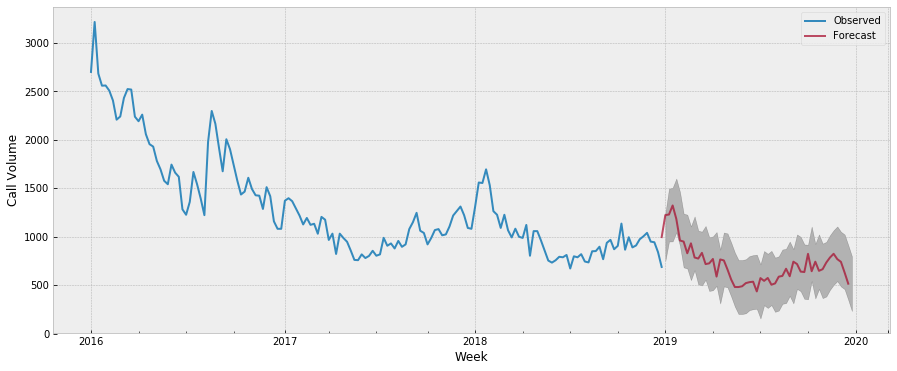

In [214]:
# plot the forecast along with the confidence band
axis = call_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Week')
axis.set_ylabel('Call Volume')
plt.legend(loc='best')
plt.show()

In [215]:
#sm.tsa.ARIMA(['endog', 'order', 'exog=None', 'dates=None', 'freq=None', "missing='none'"],)

In [162]:
#model = sm.tsa.ARIMA(call_ts, order = (2,1,2))

In [163]:
#res = 7D.fit()

In [164]:
#print(res.summary())

In [165]:
#res.forecast(steps=4)


In [216]:
#Diagnostics
    #1. Errors follows normality
    #2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
    #3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

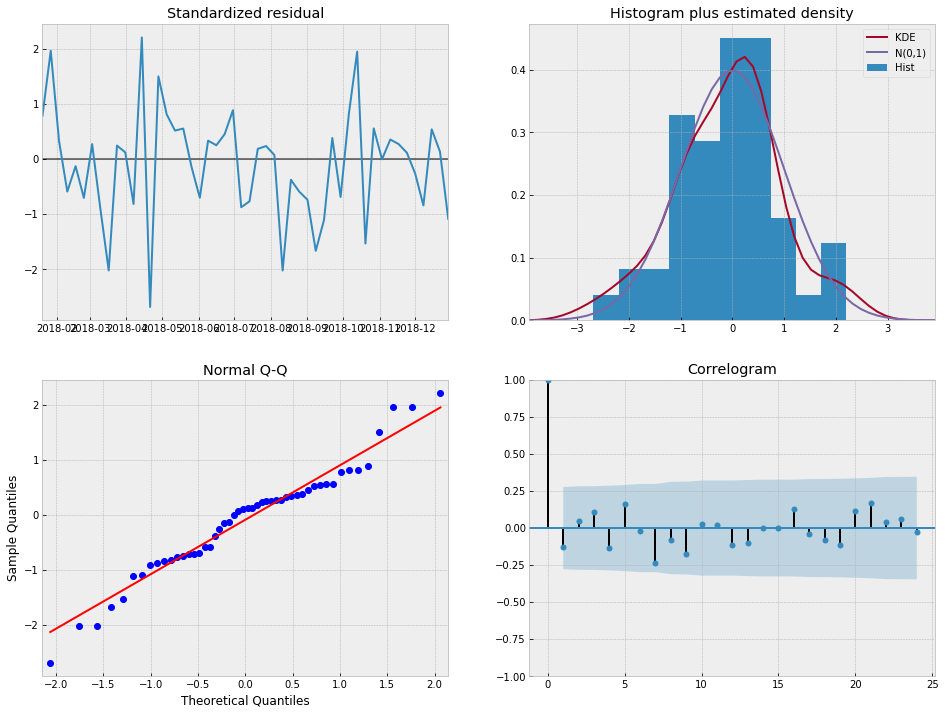

In [166]:
best_results.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

In [167]:
a = best_results.forecast(steps=52)

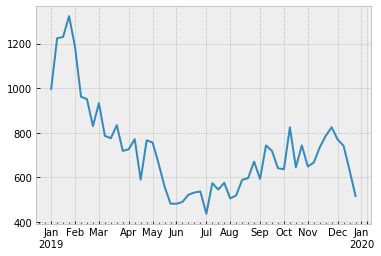

In [168]:
a.plot()

In [169]:
a = pd.Series(a)
a.head()

2019-01-05     996.443201
2019-01-12    1223.740325
2019-01-19    1229.500418
2019-01-26    1322.951729
2019-02-02    1184.212956
Freq: W-SAT, dtype: float64

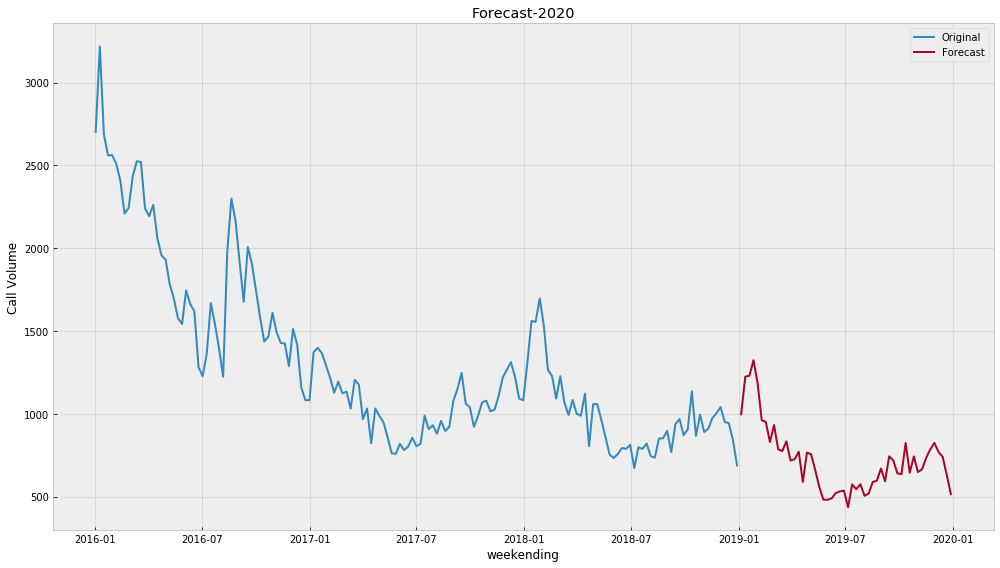

In [170]:
fig, axes = plt.subplots(1, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes.plot(call_ts.index, call_ts, label='Original')
axes.plot(a.index, a, label='Forecast')
axes.set_xlabel("weekending")
axes.set_ylabel("Call Volume")
axes.set_title("Forecast-2020")
axes.legend(loc='best')


plt.tight_layout()
plt.show()